In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys

sys.path = ['/Users/rejsmont/PycharmProjects/rdn-wdp-python/analysis'] + sys.path

In [2]:
from CellModels.Clustering.IO import ClusteringReader

basedir = '/Users/rejsmont/Google Drive/My Drive/Projects/RDN-WDP'
ato_p = ClusteringReader.read(basedir + '/processing/clustering/bigc100k6n20r1000_metadata.yml')
cells = ato_p.cells
cells

Position                      Measurements            \
                    Normalized                        Normalized             
                             x          y         z      mCherry     Venus   
Gene Sample Nucleus                                                          
Abl  1Q8GA8 1239543   1.454965  15.329020  0.751815     0.171228  0.830571   
            1239544   1.979088  15.838467  0.740619     0.187337  0.613269   
            1239545   6.102696  19.271921  0.854784     0.195026  0.498462   
            1239546  10.614307  22.123290  0.778087     0.162865  0.292009   
            1239547   0.639369  12.605514  0.797042     0.245897  0.775441   
...                        ...        ...       ...          ...       ...   
spdo U0R0WS 1989145  13.636071  -0.953809  4.117531     0.239002  0.299819   
            1989146  17.377004   0.434604  4.159967     0.320409  0.350425   
            1989147  15.133310   3.362016  4.137667     0.206911  0.285008   
            1989148  13.815633  -3.539903  4.202985     0.192044  0.313957   
            1989149  11.240356  -2.595631  4.162754     0.202423  0.247699   

                                                                        \
                                  Raw Prominence                 Angle   
                          DAPI Volume    mCherry     Venus     mCherry   
Gene Sample Nucleus                                                      
Abl  1Q8GA8 1239543  13.854070   5020   0.837475  0.910950   72.597306   
            1239544  14.397083   4522   1.006505  0.591404   44.716713   
            1239545  21.186515  12339   1.047569  0.808834  173.828641   
            1239546  18.692125   8100   0.861932  0.327443  129.476525   
            1239547  19.484099   4806   1.123186  0.985807   37.003297   
...                        ...    ...        ...       ...         ...   
spdo U0R0WS 1989145  19.406605   8595   0.570954  1.257708    7.767949   
            1989146  18.459796   7089   0.479263  1.425268   20.500289   
            1989147  19.834397   7318   0.416987  1.138248  162.220803   
            1989148  18.634784   4006   0.580034  1.377011   64.370008   
            1989149  23.191932   3773   0.573739  1.093847   29.855944   

                                Cluster  
                                   ward  
                          Venus       6  
Gene Sample Nucleus                      
Abl  1Q8GA8 1239543   88.679193     4.0  
            1239544   59.522732     4.0  
            1239545  109.918618     4.0  
            1239546   51.013798     4.0  
            1239547   88.526588     4.0  
...                         ...     ...  
spdo U0R0WS 1989145   14.861582     5.0  
            1989146  152.308561     3.0  
            1989147  163.978249     3.0  
            1989148   12.571874     5.0  
            1989149    4.547415     5.0  

[2368709 rows x 12 columns]

In [3]:
from sklearn.preprocessing import StandardScaler

x = ato_p.cells[ato_p.config.rf_features]
obs = x.index.to_frame().set_index(x.reset_index().index.astype(str))
var = x.columns.to_frame().set_index(x.columns.to_frame().reset_index().index.astype(str)).rename(columns={
    0: 'Type', 1: 'Transform', 2: 'Variable'
})
adata = sc.AnnData(X=StandardScaler().fit_transform(x), obs=obs, var=var)

In [12]:
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=False)

computing PCA
    with n_comps=6
    finished (0:00:00)


Text(0.5, 1.0, 'PCA')

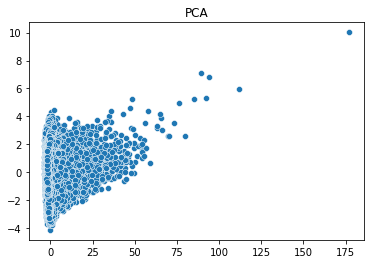

In [5]:
import seaborn as sns
sns.scatterplot(x=adata.obsm['X_pca'][:, 0], y=adata.obsm['X_pca'][:, 1]).set_title('PCA')

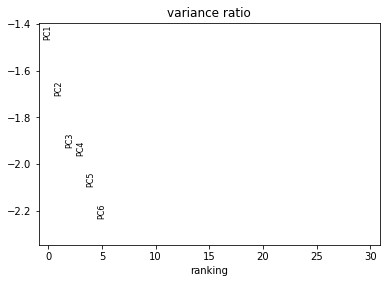

In [6]:
sc.pl.pca_variance_ratio(adata, log=True)

In [8]:
sc.settings.verbosity = 3
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_pca')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:56)


In [16]:
sc.tl.umap(adata, n_components=3)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:41:28)


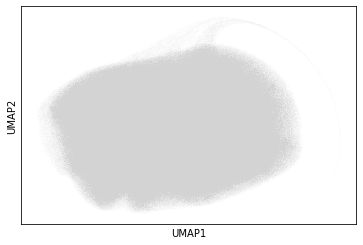

In [17]:
sc.pl.umap(adata)

In [13]:
for res in np.arange(0, 11, 1)/10:
    sc.tl.leiden(adata, res, key_added='leiden_' + str(res))

running Leiden clustering
    finished: found 1 clusters and added
    'leiden_0.0', the cluster labels (adata.obs, categorical) (0:03:00)
running Leiden clustering
    finished: found 3 clusters and added
    'leiden_0.1', the cluster labels (adata.obs, categorical) (3:05:31)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden_0.2', the cluster labels (adata.obs, categorical) (4:00:54)
running Leiden clustering
    finished: found 9 clusters and added
    'leiden_0.3', the cluster labels (adata.obs, categorical) (5:06:35)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (6:11:02)
running Leiden clustering
    finished: found 19 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (5:55:36)
running Leiden clustering
    finished: found 21 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (6:23:30)
running Leiden clusterin

In [14]:
adata

AnnData object with n_obs × n_vars = 2368709 × 7
    obs: 'Gene', 'Sample', 'Nucleus', 'leiden_0.0', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0'
    var: 'Type', 'Transform', 'Variable'
    uns: 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [15]:
adata.write('imaging_leiden.h5ad')